In [10]:
import matplotlib.pyplot as plt

plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams["font.size"] = 16

g_label_fontsize = 16

colors = [
    "#5D7599",
    "#233142",
    "#F95959",
]

edgecolors = [
    "#FFFFFF",
    "#FFFFFF",
    "#FFFFFF",
]

hatches = ["\\\\", "", ""]

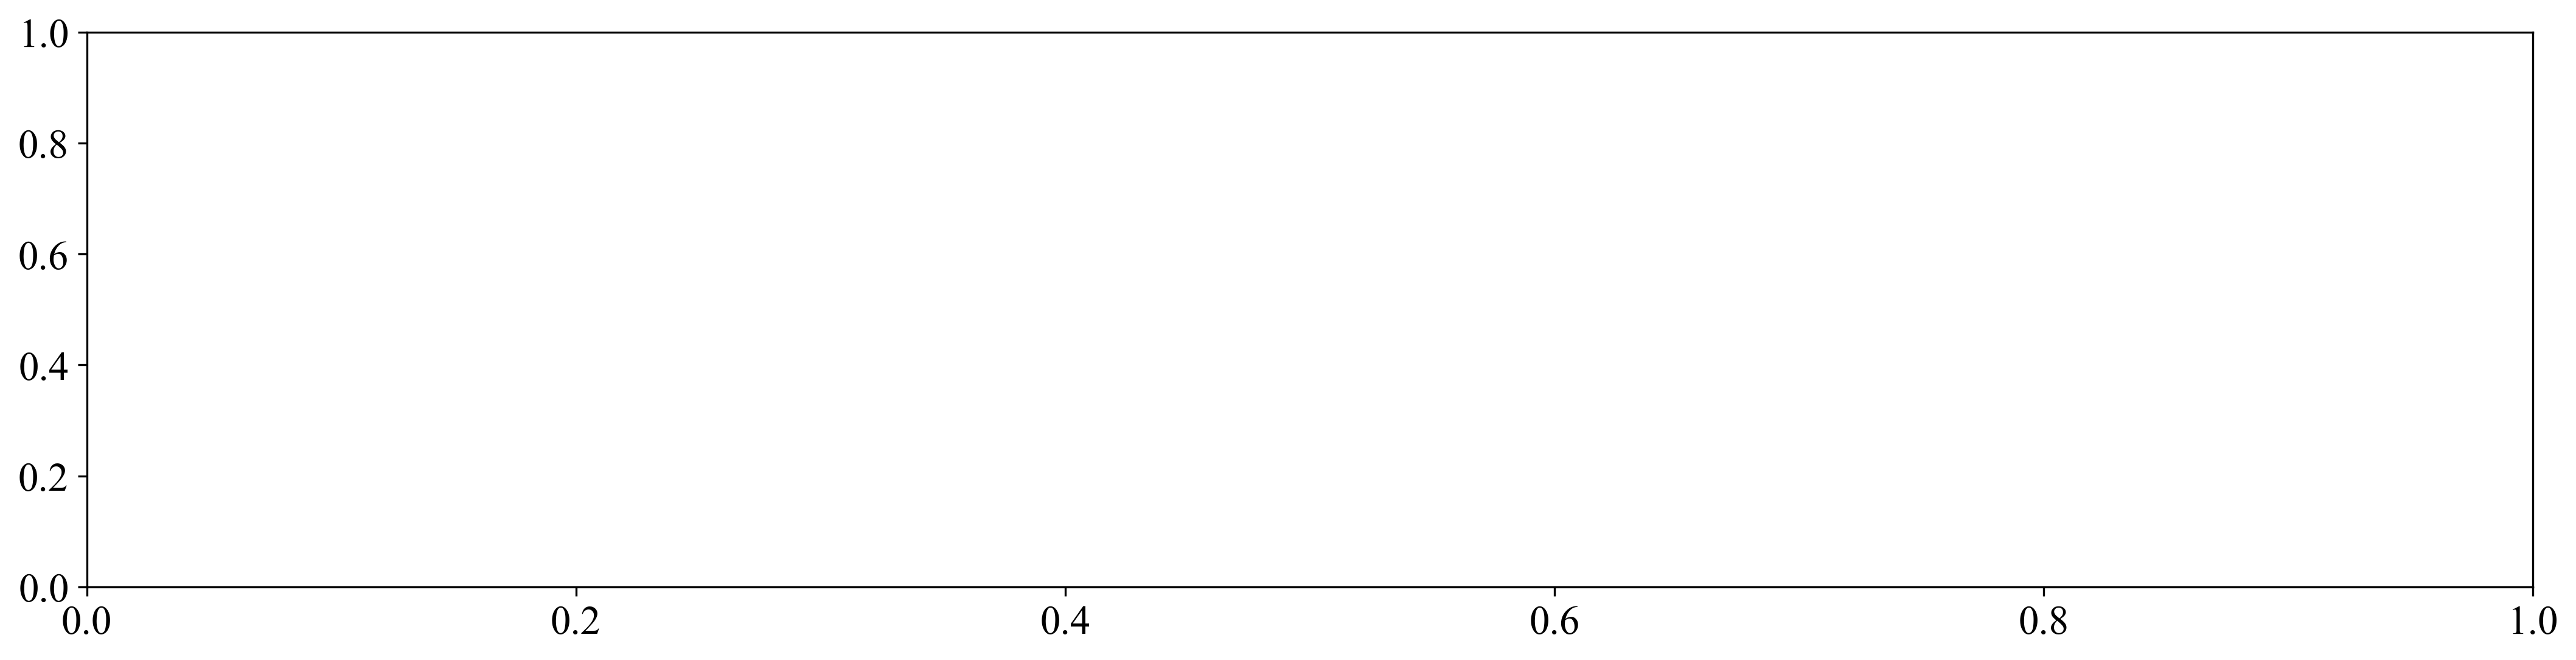

In [11]:
fig, ax = plt.subplots(
    figsize=(14, 14 / 4), ncols=1, nrows=1, constrained_layout=True, dpi=300
)

In [12]:
labels_name_a = [
    "ModelA\n8DP",
    "ModelA\n8TP",
    "ModelB\n8TP",
    "ModelA\n2DP$\\times$4TP",
    "ModelA\n2DP$\\times$8TP",
    "ModelA\n4DP$\\times$2TP",
    "ModelB\n4DP$\\times$2TP",
]


In [13]:
# overlapped
data_a = {
    labels_name_a[0]: [36.1, 100, 38.3],  # modela 8DP
    labels_name_a[1]: [16.9, 100, 46.7],  # modela 8TP
    labels_name_a[2]: [18.7, 100, 39.1],  # modelb 8TP
    labels_name_a[3]: [20.1, 100, 25.3],  # modela 2DP 4TP
    labels_name_a[4]: [100, 100, 100],  # modela 2DP 8TP
    labels_name_a[5]: [17.4, 100, 20.8],  # modela 4DP 2TP
    labels_name_a[6]: [-1, 100, 25.3],  # modelb 4DP 2TP
}
# total
data_a_diff = {
    labels_name_a[0]: 38.4,  # modela 8DP
    labels_name_a[1]: 57.6,  # modela 8TP
    labels_name_a[2]: 52.2,  # modelb 8TP
    labels_name_a[3]: 46.8,  # modela 2DP 4TP
    labels_name_a[4]: 100,  # modela 2DP 8TP
    labels_name_a[5]: 43.4,  # modela 4DP 2TP
    labels_name_a[6]: 53.9,  # modelb 4DP 2TP
}

In [14]:
legend_labels = ["Megatron-LM", "XLA", "DLRover-Lynx"]

In [15]:
bar_width = 0.2
group_spaing = 0.15

group_positions = {}
current_pos = 0

x_label_cnt = len(data_a.keys())
x_label_group_cnt = 3

for idx in range(x_label_cnt):
    group_positions[idx] = []
    for _ in range(x_label_group_cnt):
        group_positions[idx].append(current_pos)
        current_pos += bar_width
    current_pos += group_spaing

group_centers = {}
for idx, positions in group_positions.items():
    group_centers[idx] = sum(positions) / len(positions)

In [16]:
label_set = set()

for idx, (x_label, y_data) in enumerate(data_a.items()):
    diff_value = data_a_diff[x_label]
    positions = group_positions[idx]

    up_base = None

    for i, (pos, value, color, edgecolor, hatch, label) in enumerate(
        zip(
            positions,
            y_data,
            colors,
            edgecolors,
            hatches,
            legend_labels,
        )
    ):

        if label in label_set:
            local_label = None
        else:
            local_label = label
            label_set.add(local_label)

        if value == -1:
            ax.text(
                pos,
                1,
                "$\\times$OOM",
                rotation=90,
                ha="center",
                va="bottom",
                color="red",
            )
            continue

        if value == 100:
            continue

        if up_base == None:
            ax.text(
                pos,
                diff_value + 3,
                f"{round(diff_value - value, 2)}%",
                ha="center",
                fontweight="bold",
                rotation=90,
                color=colors[1],
            )
            up_base = diff_value - value
        else:
            ax.text(
                pos,
                diff_value + 3,
                f"{round((diff_value - value) - up_base, 2)}%",
                ha="center",
                fontweight="bold",
                rotation=90,
                color=colors[1],
            )

        ax.bar(
            pos,
            diff_value - value,
            width=bar_width,
            color=color,
            label=local_label,
            hatch=hatch,
            edgecolor=edgecolor,
        )

        total_label = None
        if idx == 1 and i == 0:
            total_label = "Overlapping Communication"

        ax.bar(
            pos,
            value,
            width=bar_width,
            color="#E3E3E3",
            alpha=0.6,
            label=total_label,
            edgecolor=edgecolor,
            bottom=diff_value - value,
        )

ax.set_xticks(list(group_centers.values()))
ax.set_xticklabels(list(data_a.keys()))

ax.set_ylim(0, 100)
ax.set_yticks([0, 50, 100])
ax.set_yticklabels(["0", "50", "100"], rotation=90, ha="center", va="center")

ax.tick_params(axis="x", bottom=False, labelsize=g_label_fontsize, pad=1)
ax.tick_params(axis="y", left=True, labelsize=g_label_fontsize, pad=5)

ax.set_ylabel("Communication Ratio (%)", fontsize=g_label_fontsize)

Text(13.333333333333346, 0.5, 'Communication Ratio (%)')

In [17]:
fig.legend(
    ncol=4,
    loc="upper center",
    frameon=False,
    shadow=False,
    bbox_to_anchor=(0.5, 1.08),
    fontsize=g_label_fontsize,
)

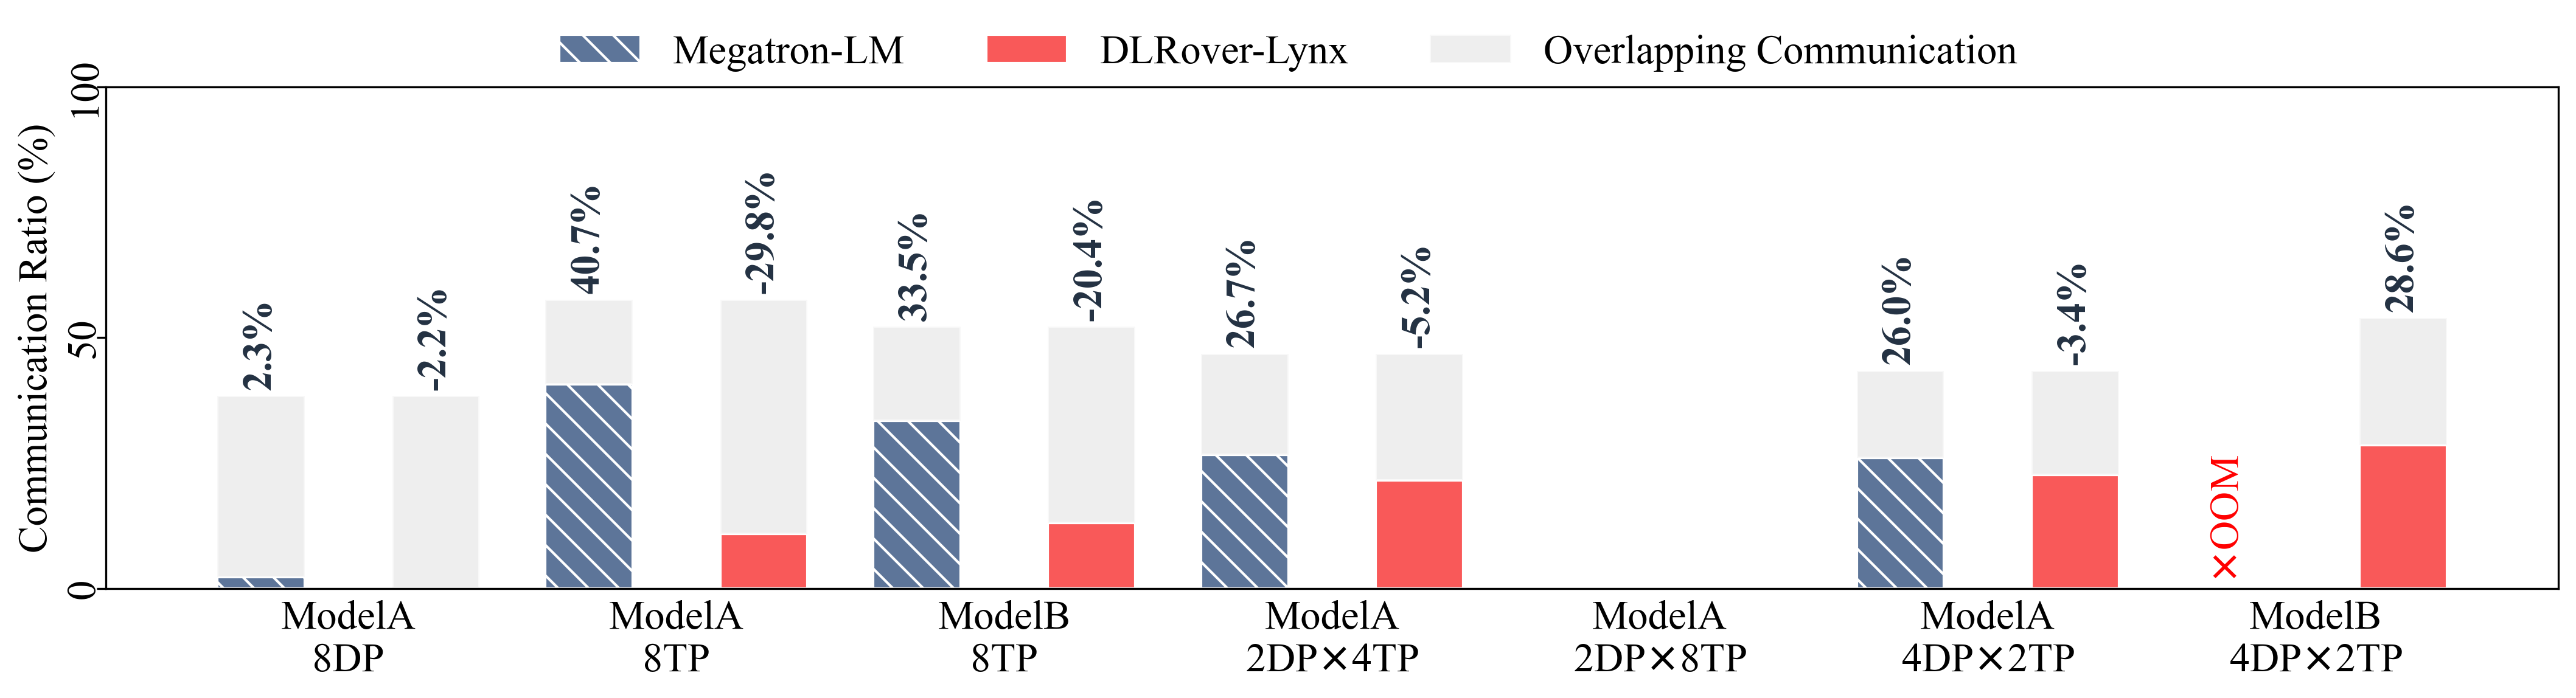

In [18]:
fig.savefig("end_to_end_overlap.pdf", bbox_inches="tight", dpi=1000)
fig